In [1]:
import os, json
import pandas as pd
import numpy as np

path_to_json = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/16'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files) 

['41.json', '37.json', '76.json', '21.json', '26.json', '27.json', '1.json', '2.json', '24.json', '25.json', '44.json', '22.json', '4.json', '42.json', '39.json', '23.json']


In [2]:
filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/16/'
for file in json_files:
    print(filepath + file)

/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/16/41.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/16/37.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/16/76.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/16/21.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/16/26.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/16/27.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/16/1.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/16/2.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/16/24.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/16/25.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/16/44.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/16/22.json
/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/16/4.json
/Users/aritrama

In [3]:
json_files.remove('76.json')
json_files.remove('42.json')

filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/16/'

match_list=[]

for file in json_files:
    df_matches=pd.read_json(filepath + file)
    match_list.extend(df_matches['match_id'].values)

In [4]:
print(match_list)

[3750201, 2302764, 18235, 18242, 18243, 18245, 18244, 18240, 18241, 3752619, 18236, 22912, 3750200, 18237]


In [5]:
def dict_to_dataframe(a):
    dataframe = df_match[a].apply(pd.Series)
    dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
    return dataframe 

filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/16/'

appended_data = []

for file in json_files:
    df_match = pd.read_json(filepath + file)
    
    df_home_team = dict_to_dataframe("home_team")
    df_away_team = dict_to_dataframe("away_team")

    frames = [df_match, df_home_team, df_away_team]

    df = pd.concat(frames, axis = 1)

    df = df[['match_id', 'home_team_home_team_name', 'away_team_away_team_name']]
    appended_data.append(df)
# see pd.concat documentation for more info
appended_data = pd.concat(appended_data)

In [6]:
appended_data

,match_id,home_team_home_team_name,away_team_away_team_name
0,3750201,Barcelona,Manchester United
0,2302764,AC Milan,Liverpool
0,18235,Bayern Munich,Inter Milan
0,18242,Juventus,Barcelona
0,18243,Real Madrid,Atlético Madrid
0,18245,Real Madrid,Liverpool
0,18244,Juventus,Real Madrid
0,18240,Borussia Dortmund,Bayern Munich
0,18241,Real Madrid,Atlético Madrid
0,3752619,AS Monaco,FC Porto


In [7]:
#temporary_match_list = [69225, 69212] #(27, 23/ (25, 23)/ (18, 23))


shot_appended_data = []
for match in match_list:

    filepath = "/Users/aritramajumdar/Downloads/statsbomb/open-data/data/events/"
    match_id = str(match)

    df = pd.read_json(filepath+match_id+".json")


    cols = ['tactics', 'related_events']
    df = df.drop(cols, axis = 1)


    def dict_to_dataframe(a):
        dataframe = df[a].apply(pd.Series)
        dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
        return dataframe 


    df_type = dict_to_dataframe("type")
    df_possession_team = dict_to_dataframe("possession_team")
    df_play_pattern = dict_to_dataframe("play_pattern")
    df_team = dict_to_dataframe("team")
    df_player = dict_to_dataframe("player")
    df_position = dict_to_dataframe("position")
    df_pass = dict_to_dataframe("pass")
    df_shot = dict_to_dataframe("shot")


    
    a = ['type', 'possession_team', 'play_pattern', 'team',
       'player', 'position', 'pass', 'shot']

    df = df.drop(a, axis = 1)

    frames = [df_type, df_play_pattern, df_team,
             df_player, df_position, df_pass, df_shot, df_possession_team]

    df_total = pd.concat(frames, axis = 1)

    frames1 = [df, df_total]

    df_final = pd.concat(frames1, axis = 1)

    shot_col = [col for col in df_total if col.startswith('shot')]
    
    df_extra = df_final[['id', 'index', 'period', 'timestamp', 'minute', 
                     'second', 'possession', 'duration', 'location', 
                     'under_pressure', 'type_name', 'play_pattern_name',
                     'pass_height', 'pass_type', 'possession_team_name', 'player_id', 'player_name']]

    df_shot = df_final[shot_col]


    frames2 = [df_extra, df_shot]
    shots = pd.concat(frames2, axis = 1)

    b = ['shot_0','shot_key_pass_id']
    shots = shots.drop(b, axis = 1)


    def dict_to_dataframe(a):
        dataframe = shots[a].apply(pd.Series)
        dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
        return dataframe 

    df_shot_type = dict_to_dataframe("shot_type")
    df_shot_technique = dict_to_dataframe("shot_technique")
    df_shot_outcome = dict_to_dataframe("shot_outcome")
    df_shot_body_part = dict_to_dataframe("shot_body_part")
    df_pass_height = dict_to_dataframe("pass_height")
    df_pass_type = dict_to_dataframe("pass_type")


    frames3 = [df_shot_type, df_shot_technique, df_shot_outcome, df_shot_body_part, df_pass_height, df_pass_type]

    df_shot_data = pd.concat(frames3, axis = 1)

    c = ["shot_type", "shot_technique", "shot_outcome", "shot_body_part", "pass_height", "pass_type"]

    shots = shots.drop(c, axis = 1)

    frames4 = [shots, df_shot_data]

    shots_data = pd.concat(frames4, axis=1)

    shots_data = shots_data[['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 
                             'possession_team_name', 'player_id', 'player_name',
                           'duration', 'location', 'under_pressure', 'type_name',
                            'play_pattern_name', 'pass_height_name',
                           'shot_end_location', 'shot_freeze_frame',
                           'shot_type_name', 'shot_technique_name', 
                           'shot_outcome_name', 'shot_body_part_name','shot_statsbomb_xg']]


    shots_data['previous_type_name'] = shots_data['type_name'].shift(1)
    shots_data['previous_pass_height_name'] = shots_data['pass_height_name'].shift(1)
    shots_data['previous_pass_height_name'] = shots_data['previous_pass_height_name'].ffill(axis = 0)

    shots_data = shots_data[shots_data['type_name'] == 'Shot']

    shots_data["location_x"] = shots_data["location"].str[0]
    shots_data["location_y"] = shots_data["location"].str[1]

    shots_data["shot_end_location_x"] = shots_data["shot_end_location"].str[0]
    shots_data["shot_end_location_y"] = shots_data["shot_end_location"].str[1]


    d = ['type_name', 'pass_height_name', 'location', 'shot_end_location']
    shots_data = shots_data.drop(d, axis = 1)  
    
    shots_data['match_id'] = int(match)
    shot_appended_data.append(shots_data)
    

shot_appended_data = pd.concat(shot_appended_data)

In [8]:
shots_data_final = pd.merge(shot_appended_data, appended_data, on='match_id')
shots_data_final['home_away'] = np.where((shots_data_final['possession_team_name'] == shots_data_final['home_team_home_team_name']), 
                                         'Home', 'Away')


#e = ['home_team_home_team_name', 'away_team_away_team_name']
#shots_data_final = shots_data_final.drop(e, axis = 1)

In [9]:
shots_data_final

,id,index,period,timestamp,minute,second,possession,possession_team_name,player_id,player_name,...,previous_type_name,previous_pass_height_name,location_x,location_y,shot_end_location_x,shot_end_location_y,match_id,home_team_home_team_name,away_team_away_team_name,home_away
0,ae4039ee-9efd-4937-a0b9-b50cf44ab8f4,50,1,2022-11-23 00:01:25.896,1,25,4,Manchester United,5207.0,Cristiano Ronaldo dos Santos Aveiro,...,Foul Won,Ground Pass,92.5,23.2,117.8,39.8,3750201,Barcelona,Manchester United,Away
1,8fc1aeff-79bd-4456-81fe-de5068c6c30b,53,1,2022-11-23 00:01:27.964,1,27,4,Manchester United,20173.0,Ji-Sung Park,...,Ball Recovery,Ground Pass,112.6,36.8,113.6,37.2,3750201,Barcelona,Manchester United,Away
2,4a5d5e8b-3b65-4885-b36a-81bf7df348c6,60,1,2022-11-23 00:01:59.683,1,59,5,Manchester United,3538.0,Wayne Mark Rooney,...,Ball Recovery,High Pass,95.9,28.5,120.0,19.6,3750201,Barcelona,Manchester United,Away
3,552bd9b5-390a-4a05-9f9a-aa840a559b4a,219,1,2022-11-23 00:06:45.728,6,45,16,Manchester United,5207.0,Cristiano Ronaldo dos Santos Aveiro,...,Carry,Ground Pass,87.9,52.7,120.0,45.1,3750201,Barcelona,Manchester United,Away
4,1e573054-3265-4627-beab-08f452936a16,261,1,2022-11-23 00:08:06.647,8,6,19,Manchester United,5207.0,Cristiano Ronaldo dos Santos Aveiro,...,Pressure,Ground Pass,106.4,24.6,120.0,46.8,3750201,Barcelona,Manchester United,Away
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,77d35786-8a38-4878-bb93-44d87b29af35,4684,5,2022-11-23 00:03:48.093,123,48,262,Chelsea,20330.0,Frank Lampard,...,Goal Keeper,Ground Pass,108.0,40.0,119.0,40.1,18237,Bayern Munich,Chelsea,Away
452,7241b443-c6e5-4f6b-aa86-dca0086fb3ea,4686,5,2022-11-23 00:04:28.006,124,28,263,Bayern Munich,19289.0,Ivica Olić,...,Goal Keeper,Ground Pass,108.0,40.0,119.0,42.6,18237,Bayern Munich,Chelsea,Home
453,01992a93-2d14-4586-961d-02ccddd789a3,4688,5,2022-11-23 00:05:18.193,125,18,264,Chelsea,12529.0,Ashley Cole,...,Goal Keeper,Ground Pass,108.0,40.0,120.0,43.8,18237,Bayern Munich,Chelsea,Away
454,18d17a04-728f-4622-a8e4-bdd5203157d9,4690,5,2022-11-23 00:06:04.745,126,4,265,Bayern Munich,18414.0,Bastian Schweinsteiger,...,Goal Keeper,Ground Pass,108.0,40.0,119.0,43.2,18237,Bayern Munich,Chelsea,Home


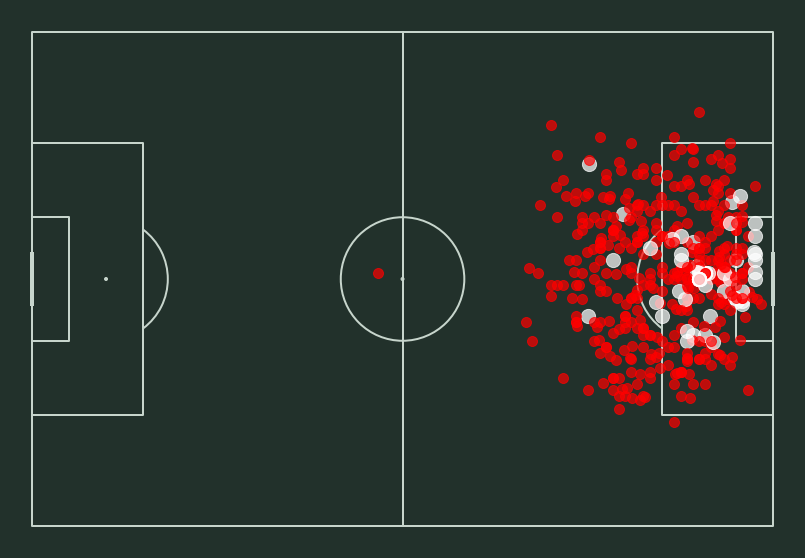

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch

fig, ax = plt.subplots(figsize=(20, 10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

"""
#The statsbomb pitch from mplsoccer
pitch = VerticalPitch(pitch_type='statsbomb',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True, half = True)
"""
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', 
              figsize=(16, 11), constrained_layout=True, tight_layout=False)


pitch.draw(ax = ax)
plt.gca().invert_yaxis()

for x in range(len(shots_data_final['location_x'])):
    if shots_data_final['shot_outcome_name'].iloc[x] == 'Goal':
        #plt.plot((passes['x'].iloc[x],passes['end_x'].iloc[x]),(passes['y'].iloc[x],passes['end_y'].iloc[x]),color='green')
        plt.scatter(shots_data_final['location_x'].iloc[x], shots_data_final['location_y'].iloc[x], c = 'w', s=200, alpha = 0.7)
    else:
        plt.scatter(shots_data_final['location_x'].iloc[x], shots_data_final['location_y'].iloc[x], c = 'r', s=100, alpha = 0.7)
        
    

In [11]:
shots_data_final.to_excel("UCLfinal.xlsx")